### Text Clustering and Topic modeing

##### We will explote ArXiX's Articles

In [2]:
### load articles
from datasets import load_dataset
dataset = load_dataset("maartengr/arxiv_nlp")['train']

In [3]:
### Extract meta data
abstracts = dataset["Abstracts"]
titles = dataset["Titles"]

In [5]:
## Embeding documents
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer("thenlper/gte-small")

In [6]:
embeddings = embedding_model.encode(abstracts, show_progress_bas=True)

In [7]:
embeddings.shape

(44949, 384)

In [8]:
from umap import UMAP

In [9]:
## WE reduce the input embeddings frpm 385 dimentions to 5 dimentions

umap_model = UMAP(n_components=5, min_dist=0.0, metric="cosine", random_state=42)

In [10]:
reduced_embeddings = umap_model.fit_transform(embeddings)

D:\anaconda3\envs\thellmbook\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\anaconda3\envs\thellmbook\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [11]:
reduced_embeddings.shape

(44949, 5)

In [13]:
### HDBSCAN for clustering
from hdbscan import HDBSCAN
hdbscan_model = HDBSCAN(min_cluster_size = 50, metric = "euclidean",
                        cluster_selection_method="eom").fit(reduced_embeddings)

D:\anaconda3\envs\thellmbook\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\anaconda3\envs\thellmbook\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [14]:
clusters = hdbscan_model.labels_
len(set(clusters))

154

In [15]:
### inspention the clusters

import numpy as np

cluster = 1

for index in np.where(clusters==cluster)[0][:3]:
    print(abstracts[index][:300] + "...\n")
    print("--")

  We report on work in progress on extracting lexical simplifications (e.g.,
"collaborate" -> "work together"), focusing on utilizing edit histories in
Simple English Wikipedia for this task. We consider two main approaches: (1)
deriving simplification probabilities via an edit model that accounts f...

--
  Overall, the two main contributions of this work include the application of
sentence simplification to association extraction as described above, and the
use of distributional semantics for concept extraction. The proposed work on
concept extraction amalgamates for the first time two diverse resea...

--
  Lexical substitutes have found use in areas such as paraphrasing, text
simplification, machine translation, word sense disambiguation, and part of
speech induction. However the computational complexity of accurately
identifying the most likely substitutes for a word has made large scale
experiment...

--


In [16]:
### visualise results

### need to reduce dimentions  to 2

# import numpy as np

## Reduce 384 -dimentional embedding to two dimentionsfor easier visualization


reduced_embeddings = UMAP(n_components=2, min_dist=0.0, metric="cosine", 
                          random_state=42).fit_transform(embeddings)

D:\anaconda3\envs\thellmbook\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\anaconda3\envs\thellmbook\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [17]:
import pandas as pd

## create data frame

df = pd.DataFrame(reduced_embeddings, columns=["x", "y"])
df["title"] = titles
df["cluster"] = [str(c) for c in clusters]

In [18]:
df.head()

,x,y,title,cluster
0,4.536512,12.393435,Introduction to Arabic Speech Recognition Usin...,-1
1,4.514036,12.366186,Arabic Speech Recognition System using CMU-Sph...,129
2,4.122340,11.768230,On the Development of Text Input Method - Less...,-1
3,1.601519,9.992537,Network statistics on early English Syntax: St...,136
4,3.874226,7.467805,Segmentation and Context of Literary and Music...,-1


In [19]:
### select outlier and non outlier 
to_plot = df.loc[df.cluster != "-1" , :]
outliers = df.loc[df.cluster == "-1" , :]

In [20]:
outliers.shape

(14236, 4)

(-7.743558382987976,
 11.537891364097595,
 -1.3265294581651688,
 16.506302013993263)

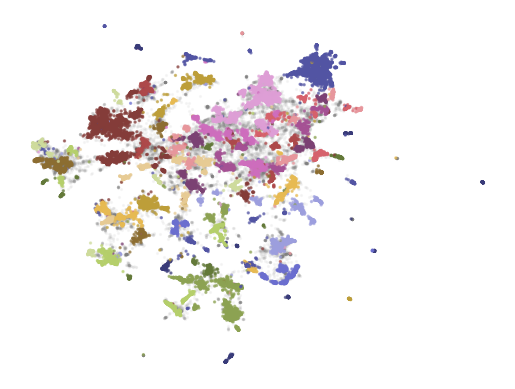

In [21]:
import matplotlib.pyplot as plt

## plot outliers and non outliers seperatoly

plt.scatter(outliers.x, outliers.y, alpha=0.05, s=2, c="gray")

plt.scatter(to_plot.x, to_plot.y, c =to_plot.cluster.astype(int),
            alpha=0.6, s=2, cmap="tab20b" )
plt.axis("off")